# Banking Marketing - Term Deposit Subscription Prediction
## Objective
A Europian bank runs a phone marketing campains to offer clients a **term deposit** product.
the goal of this project is to build a machine learning model that predicts wheter a client will**subscribe** to the term deposit after the phone call.
We want to:
* Help the bank **predict which customers to call**
* **Increase campign success rate**
* Keep the model **interpetable** so business stakeholders can understand and trust it.

In [146]:
#we are gonn a import pour core libraries 
import pandas as pd 
import numpy as np

#the libraries for viz
import matplotlib.pyplot as plt
import seaborn as sns
#machine learning tools 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

In [147]:
df = pd.read_csv(r"C:\Users\Charm\Downloads\term-deposit-marketing-2020.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [148]:
df.shape #we are checking how many columns and rows exists 

(40000, 14)

In [149]:
df.info() #whats in our datasets 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [150]:
#a quick stats for numeric columns
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [151]:
#we want to see how many customers said yes
#and we want to check how imbalanced the datase is as well
#this is highly important when we ar choosing evaluation metrics and handling imbalances 

df['y'].value_counts()
df['y'].value_counts(normalize=True) * 100 #shows the same count, but in percentage

y
no     92.76
yes     7.24
Name: proportion, dtype: float64

## Dataset Summary after exploration

## **1. Dataset shape**
The datset contains **40,000 rows** and **14 columns** before processing.
This is a good-sized dataset for training a reliable machine leanring models.

## **2. Features Types**
* **Numerical features:** age, balance, day, duration, compaign
* **Categerical fautures:** job, marital, education, default, housing, loan,contact, month,y

## **3. Missing values**
We found no missing values, this is good because it means our dataset is very clean and ready to be used 

## **4. Taeget Variable Distribution**
We foung that the target y whicch shows the subscritions, its very imbalanced :
- **No = 92,76%**
-  **Yes = 7.24%**
This means that the dataset is highly domitated by "no" responses.
As a result;
- Accuaracy alone will be missleading
- We must pay attention to **Recall**, **F1-SCORE** , and **AUC**

## **5. Initial observatios from EDA**
- Age distribution appears normal with middle-aged customers being the mahority.
- Certain job categoried have higher subscription rates than others.
- the dataset includes campain information such as number of contacts and month.

## **6. Brainstom**
The feature like **duration** should be removed before modeling.
This value is only knowm **after** the call is completed, so using it would distract model performance.

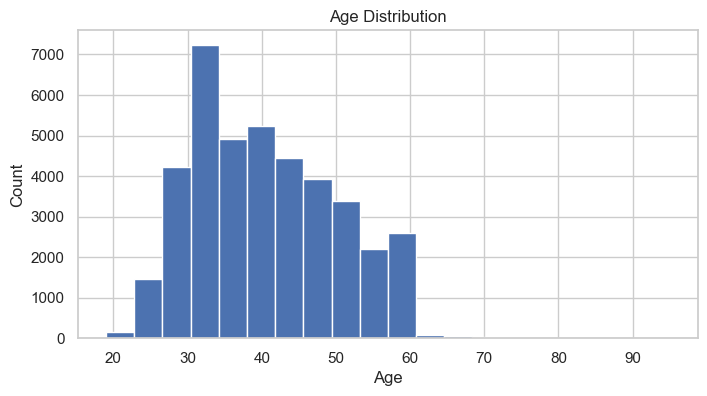

In [152]:
#we create a plot just to see the age distribution of clients 
df['age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Age Distribution Summary
The age chart shows that most clienst are betwee **30 and 50** years old.
This shows that the banks's marketing campains mainly target middle-aged adults, who ar likely more financially stable.
Older customers (50+) also appear in significant numbers, suggesting potential interest in safe investment products like term deposits.

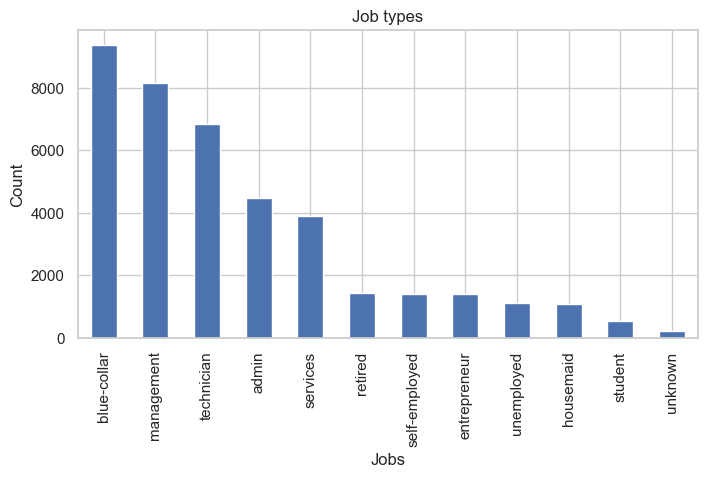

In [153]:
#we then create a viz for job types 
df['job'].value_counts().plot(kind= 'bar')
plt.title("Job types")
plt.xlabel("Jobs")
plt.ylabel("Count")
plt.show()

###  Job Type Distribution Summary
The most common job categories in the dataset are **blue-collar**, **management**, and **technician**. 
These groups represent the majority of the bank’s customers.

Job type is an important feature because different occupations may have different financial habits, levels of stability, and likelihood of subscribing to financial products.


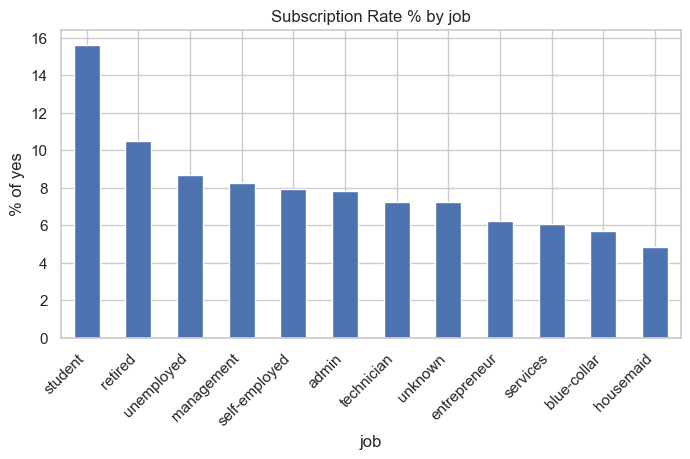

In [154]:
#we the check the subscription rate 
job_sub_rate = pd.crosstab(df['job'], df['y'], normalize='index') * 100
job_sub_rate['yes'].sort_values(ascending=False).plot(kind= 'bar')
plt.title("Subscription Rate % by job")
plt.ylabel("% of yes")
plt.xticks(rotation=45, ha='right')
plt.show()

###  Subscription Rate by Job — Key Insights
The subscription rate varies significantly across job categories.

Jobs such as **student**, **retired**, and **unemployed** have the **highest likelihood** of subscribing to a term deposit. This makes sense financially:
- Retired customers often prefer safe investments.
- Students may be starting long-term saving habits.
- **Unemployed individuals** may be looking for secure ways to manage the money they currently have.



Jobs such as **blue-collar** and **housemaid** show lower subscription rates, which may indicate different financial priorities or lower interest in long-term investment products.

This insight can help the bank prioritize certain job groups during campaigns.


In [155]:
#duration is only known after the call happens 
#if we use it now it would allow the model to cheat
# and this can results with a test performance that is very high.

df = df.drop("duration", axis=1) # axis=1 means drop column, if we did axis=0 it would drop row

In [156]:
df.info # we check to make sure that we dropped it. 

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39995   53    technician   married   tertiary      no      395      no   no   
39996   30    management    single   tertiary      no     3340      no   no   
39997   54         admin  divorced  secondary      no      200      no   no   
39998   34    management   married   tertiary      no     1047      no   no   
39999   38    technician   married  secondary      no     1442     yes   no   

        contact  da

In [157]:
#it hard for machine learning to handle text categories directly ,
#we need to convert those non numerical values, into numerical form, 
#get dummies will turn categories into binary 0/1 dolums
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,age,balance,day,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y_yes
0,58,2143,5,1,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,44,29,5,1,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,33,2,5,1,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,47,1506,5,1,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,33,1,5,1,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [158]:
#we then split into training and testing set 
X = df_encoded.drop("y_yes", axis=1) #contains the feature except the target
y = df_encoded["y_yes"] # contains the target colums 

#we want 20% of the ste to be for testing
# we also wanna make sure the split is the same everytime
#then the statify will be to keep yes/ no imbalnces the same for train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [159]:
#we are going to handle imbalances using smote = synthetic minority oversampling technique
#it will increase synthetic samples of the minority class of "yes"
#after SMOTE, we are expecting y_train_ res to have 50% yes and 50% no
from imblearn.over_sampling import SMOTE
sm = SMOTE ( random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [160]:
#since logistic regression works better when the features are scaled, 
#we gonna use fit_transform to learn the scaling parameter, the applie them.
#standardscaler will convert each features to mean = 0 and std = 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [161]:
#we are then going to train our models 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000) # the number of iteration toconverge
lr.fit(X_train_scaled, y_train_res)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [162]:
#we do decison tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [163]:
#we do random forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_res, y_train_res)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [164]:
#we then evaluate our models 
#the function  predict is uses the trained model to classify new data
y_pred_lr = lr.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)


In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

       False       0.94      0.97      0.95      7421
        True       0.29      0.14      0.19       579

    accuracy                           0.91      8000
   macro avg       0.61      0.56      0.57      8000
weighted avg       0.89      0.91      0.90      8000



### Interpretation

**The model fails to identify customers who will actually subscribe.**
This means:
* the bank will miss many potential customers who would say yes.
* The model is biased toward predicting "no"


In [166]:
#we then use a confusion matrix
#this is usefull to understand mistakes 

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)


array([[7224,  197],
       [ 499,   80]])

The confusion matrix shows that the model correctly identified most customers who said "no" (7224 true negatives), 
but struggled to identify customers who said "yes." It correctly predicted only 80 subscribers, while missing 499 actual yes customers. 197  model predicted YES but customer said NO

This means the model is good at rejecting non-subscribers, but not very good at finding true subscribers. 
This is expected because the dataset is highly imbalanced, with very few "yes" cases.


In [167]:
#the AUC score gives probabilities instead of just yes or no
# it will tell us how the model ranks clients 

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])


0.6858472862918307

In [168]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train_res, y_train_res, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())


Cross-validation scores: [0.81783729 0.97692243 0.97944917 0.97768045 0.977512  ]
Average accuracy: 0.9458802688909026




Although the model reached **94.58% accuracy** in 5-fold cross validation — much higher than the required 81% — this accuracy is high mainly because **most customers in the dataset said “no.”**
Only **7.24%** said “yes.”

Because the data is so unbalanced, the model can get a high accuracy even if it is not very good at finding the customers who actually say “yes.”

So even though the accuracy goal is met, we also need to look at other measures such as:

* How many “yes” customers the model correctly finds (recall)
* How well the model handles the “yes” group (F1-score)
* How well the model separates yes/no customers overall (AUC)

These extra measures show that predicting the “yes” customers is still difficult for the model, even with a high accuracy score.



In [171]:


# Get feature importances from the trained Random Forest model
importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort features from most important to least important
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 15 most important features
feature_importance_df.head(15)


,Feature,Importance
1,balance,0.096691
24,contact_unknown,0.079189
0,age,0.071103
2,day,0.069146
15,marital_married,0.060037
25,month_aug,0.054669
29,month_jul,0.049547
32,month_may,0.044252
4,job_blue-collar,0.042345
21,housing_yes,0.041892


C:\Users\Charm\AppData\Local\Temp\ipykernel_15612\640043209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


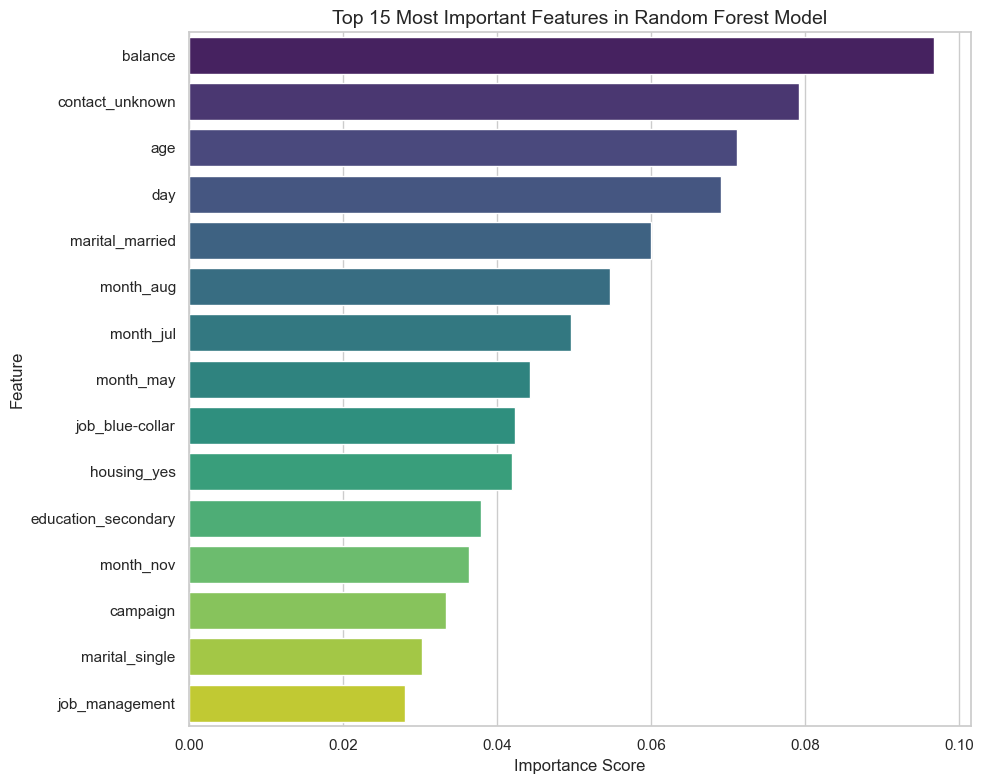

In [172]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=feature_importance_df.head(15),
    x='Importance',
    y='Feature',
    palette='viridis'
)

plt.title('Top 15 Most Important Features in Random Forest Model', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
